In [1]:
#Opens an h5 time series recording (V3 or V4)
#Reads and Displays header
#Reads the data, extracts and plot a selection of data

using SeisNoise, SeisIO, HDF5, PyPlot, PlotlyJS

WebIO._IJuliaInit()

In [2]:
println("Julia version ",VERSION)

Julia version 1.8.1


In [3]:
# assign path
fname = "/home/spri902/bc_cribs/data_2022-10-06_01-16-00_UTC_009164.h5"
fid = h5open(fname, "r")
data = read(fid, "/Acquisition/Raw[0]/RawData")
timestamp = read(fid, "/Acquisition/Raw[0]/RawDataTime") / 1000000
close(fid)
#set datetime format
# datetimeFormat = "%Y-%m-%d %H:%M:%S"

In [4]:
println("There are ", size(data)[1], " channels and ", size(data)[2], " samples per channel in this file")

There are 55 channels and 120000 samples per channel in this file


In [5]:
# natively create a matrix of size(data) of 32bit float type
filt_normdata = zeros(Float32, size(data));

In [6]:
for i in 1:size(data)[2]
    # note how dot "." is used for an operation between a matrix and a float
    filt_normdata[:, i] = (data[:, i] .- minimum(data[:, i])) / (maximum(data[:, i]) .- minimum(data[:, i]))
end

chan_step = 1
time_step = 1

1

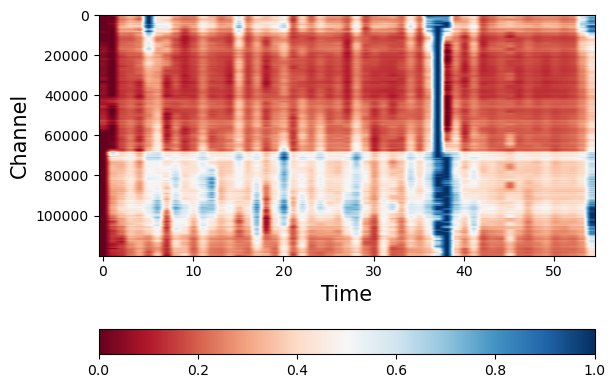

PyObject <matplotlib.colorbar.Colorbar object at 0x7f3e621629a0>

In [7]:
# slicing a vector has different grammar. start:stride:end
imshow(transpose(filt_normdata[1:chan_step:end,1:time_step:end]), 
               aspect = "auto", cmap = "RdBu")

xlabel("Time", fontsize = 15)
ylabel("Channel", fontsize = 15)
colorbar(location = "bottom", pad = 0.2)

In [10]:
using PlotlyJS
PlotlyJS.plot(PlotlyJS.contour(
    z = filt_normdata[1:chan_step:end,1:time_step:end]',
    contours_coloring="heatmap"
))
